Accuracy: 0.5947368421052631
Precision: 0.5654574969791418
Recall: 0.5947368421052631
F1 Score: 0.57211371744752

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.61      0.63       110
           1       0.33      0.21      0.25        97
           2       0.64      0.80      0.71       173

    accuracy                           0.59       380
   macro avg       0.54      0.54      0.53       380
weighted avg       0.57      0.59      0.57       380



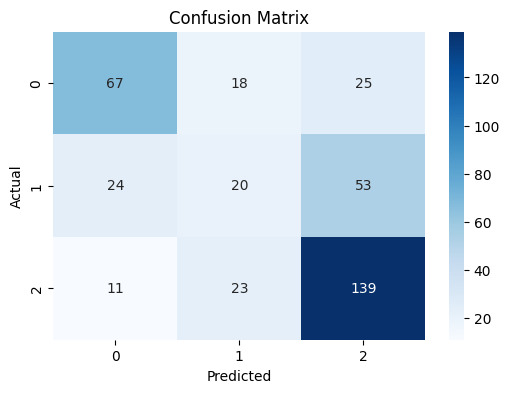

Predicted Match Outcome for Man United vs Chelsea: H


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("combined_data.csv")

# Ensure necessary columns exist
required_columns = ['HomeTeam', 'AwayTeam', 'FTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HTAG', 'HTHG', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing required columns: {missing_columns}")

# Drop rows with missing values only in required columns
df.dropna(subset=required_columns, inplace=True)

# Ensure dataset is not empty after removing missing values
if df.empty:
    raise ValueError("Dataset is empty after removing missing values.")

# Encoding categorical variables
le = LabelEncoder()
df['FTR'] = le.fit_transform(df['FTR'])  # Full-time result (target variable)

team_encoder = LabelEncoder()
df['HomeTeam'] = team_encoder.fit_transform(df['HomeTeam'])
df['AwayTeam'] = team_encoder.transform(df['AwayTeam'])

# Selecting relevant features
features = ['HomeTeam', 'AwayTeam', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HTAG', 'HTHG', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
target = 'FTR'

X = df[features]
y = df[target]

# Ensure dataset is not empty
if X.shape[0] == 0:
    raise ValueError("Dataset is empty after preprocessing.")

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model with tuned hyperparameters to avoid overfitting
model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Function to test a new prediction
def predict_match(home_team_name, away_team_name, hs, as_, hst, ast, hf, af, htag, hthg, hc, ac, hy, ay, hr, ar):
    if home_team_name not in team_encoder.classes_ or away_team_name not in team_encoder.classes_:
        raise ValueError("One or both team names are not recognized.")

    home_team = team_encoder.transform([home_team_name])[0]
    away_team = team_encoder.transform([away_team_name])[0]

    input_df = pd.DataFrame([[home_team, away_team, hs, as_, hst, ast, hf, af, htag, hthg, hc, ac, hy, ay, hr, ar]],
                        columns=features)
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    result = le.inverse_transform(prediction)[0]
    return result

# Example usage
home_team = "Man United"
away_team = "Chelsea"
example_result = predict_match(home_team, away_team, 10, 8, 5, 4, 12, 10, 1, 2, 6, 5, 2, 1, 0, 0)
print(f"Predicted Match Outcome for {home_team} vs {away_team}: {example_result}")